<a href="https://colab.research.google.com/github/ParasNandwani/EDA_PROJECT/blob/master/whatsAppChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import regex as re
import warnings 
warnings.filterwarnings('ignore')
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator


In [2]:
whatsAppChat= pd.read_csv('/content/drive/My Drive/DataScience Books/INSAID_CHAT.txt',error_bad_lines=False,skiprows=1)

b'Skipping line 7: expected 2 fields, saw 3\nSkipping line 10: expected 2 fields, saw 4\nSkipping line 14: expected 2 fields, saw 5\nSkipping line 25: expected 2 fields, saw 4\nSkipping line 32: expected 2 fields, saw 3\nSkipping line 50: expected 2 fields, saw 3\nSkipping line 80: expected 2 fields, saw 3\nSkipping line 113: expected 2 fields, saw 3\nSkipping line 158: expected 2 fields, saw 3\nSkipping line 166: expected 2 fields, saw 3\nSkipping line 193: expected 2 fields, saw 3\nSkipping line 202: expected 2 fields, saw 3\nSkipping line 208: expected 2 fields, saw 3\nSkipping line 217: expected 2 fields, saw 3\nSkipping line 228: expected 2 fields, saw 3\nSkipping line 258: expected 2 fields, saw 4\nSkipping line 298: expected 2 fields, saw 3\nSkipping line 300: expected 2 fields, saw 3\nSkipping line 319: expected 2 fields, saw 3\nSkipping line 354: expected 2 fields, saw 3\nSkipping line 355: expected 2 fields, saw 3\nSkipping line 401: expected 2 fields, saw 3\nSkipping line 40

In [3]:
whatsAppChat.head()

,8/11/19,"10:02 AM - Shashank INSAID created group ""INSAID DS AUG10"""
0,9/22/19,11:03 AM - You joined using this group's invi...
1,9/22/19,11:03 AM - +91 80508 32456: Waiting for this ...
2,9/22/19,11:04 AM - +91 98100 45452: OK jatin.
3,9/22/19,11:04 AM - +91 80508 32456: Welcome back Para...
4,9/22/19,11:05 AM - +91 80508 32456: Ok so we have now...


In [0]:
def startsWithAuthor(message):
  patterns=[
            '([\w]+):',
            '([\w]+[\s]+[\w]+):',
            '([\w]+[\s]+[\w]+[\s]+[\w]+):',
            '([+]\d{2} \d{5} \d{5}):',
            '([+]\d{2} \d{3} \d{3} \d{3})',
            '([+]\d{2} \d{1} \d{2} \d{4} \d{4})',
            '([+][0-9] ([(]\d{3}[)]) \d{3}-\d{4})',
            '([+]\d{2} \d{4} \d{3} \d{3})'
            ]

  pattern='^'+'|'.join(patterns)
  result=re.match(pattern,message)
  if result:
    return True
  return False

In [0]:
def getDataPoint(line):
  # line= 18/06/17, 22:47 - Loki: Why do you have 2 numbers, Banner?
  splitLine=line.split(' - ')# splitLine=['18/06/17, 22:47','Loki: Why do you have 2 numbers, Banner?']
  dateTime=splitLine[0]
  date,time = dateTime.split(', ')#date='18/06/17 time='18/06/17

  message = ' '.join(splitLine[1:])

  if startsWithAuthor(message):
    splitmessage=message.split(': ')
    author=splitmessage[0]
    message=' '.join(splitmessage[1:])
  else:
    author = None
  return date, time, author, message

In [0]:
def startsWithDateTime(s):
  pattern='^([0-9]|[0-1][0-2])(\/)([0-2][0-9]|[3][0-1])(\/)(\d{2}|\d{4}), ([0-9]|[0-1][0-9]):([0-9][0-9])'
  result=re.match(pattern,s)
  if result:
    return True
  return False

In [0]:
parsedData=[]
chat_path='/content/drive/My Drive/DataScience Books/INSAID_CHAT.txt'

with open(chat_path,encoding='utf-8') as fp:
  fp.readline()
  fp.readline()
  fp.readline() # skipping first line of the file (usually contains information about end to end encryption)
  messageBuffer=[]#Buffer to capture intermediate output for multi line messages
  Date,Time,Author =None,None,None # Intermediate variable to keep track of the current message being passed

  while True:
    line=fp.readline()
    if not line:
      break
    line= line.strip()
    if startsWithDateTime(line):#If a line starts with date time pattern then it indicates the beginning of new line
        if len(messageBuffer) > 0 :# check if message buffer contains character from previous iterations
          parsedData.append([Date,Time,Author,''.join(messageBuffer)])
        messageBuffer.clear()# Clear the message buffer so it can be use for the next message
        Date,Time,Author,Message = getDataPoint(line)
        messageBuffer.append(Message)
    else :
      messageBuffer.append(line)# if a line dosen't start with a Date Time pattern ,then it is oart of multiline message ,so just append to buffer


In [88]:
df= pd.DataFrame(data=parsedData,columns=['Date','Time','Author','Message'])
df.head()

,Date,Time,Author,Message
0,9/22/19,11:03 AM,+91 80508 32456,Waiting for this message
1,9/22/19,11:04 AM,+91 98100 45452,OK jatin.
2,9/22/19,11:04 AM,+91 80508 32456,Welcome back Paras.. 😊
3,9/22/19,11:05 AM,+52 1 33 3101 4944,And you can watch youtube tutorials to work on...
4,9/22/19,11:05 AM,+91 80508 32456,Ok so we have now two weeks of time.. Revise e...


In [91]:
df.describe()

,Date,Time,Author,Message
count,7935,7935,7870,7935
unique,78,1106,133,6493
top,12/14/19,11:53 AM,Lalit Garg INSAID,<Media omitted>
freq,573,29,1237,437


In [95]:
df[df['Author'].isnull()]

,Date,Time,Author,Message
89,9/24/19,12:09 AM,None,"+91 77740 30401 changed the subject from ""INSA..."
1667,11/16/19,9:29 AM,None,+91 95401 82418 changed the group description
1916,11/16/19,2:20 PM,None,+91 83778 07789 left
2198,11/19/19,12:37 PM,None,+91 99401 42018 joined using this group's invi...
2580,11/23/19,11:35 AM,None,+91 91096 94003 joined using this group's invi...
...,...,...,...,...
6674,1/13/20,5:18 PM,None,+91 98999 29615 joined using this group's invi...
7525,1/27/20,11:10 PM,None,Gireesh INSAID left
7541,1/28/20,10:41 AM,None,Gireesh INSAID joined using this group's invit...
7542,1/28/20,11:00 AM,None,+91 98860 76550 left


In [97]:
df.dropna(inplace=True)
df[df['Author'].isnull()]
df.describe()

,Date,Time,Author,Message
count,7870,7870,7870,7870
unique,78,1105,133,6433
top,12/14/19,11:53 AM,Lalit Garg INSAID,<Media omitted>
freq,573,29,1237,437


In [102]:
df[df['Message']=='<Media omitted>']

,Date,Time,Author,Message
17,9/22/19,5:22 PM,+91 77740 30401,<Media omitted>
27,9/23/19,1:29 PM,+91 91481 12743,<Media omitted>
40,9/23/19,8:33 PM,Shashank INSAID,<Media omitted>
41,9/23/19,10:07 PM,+91 70120 13239,<Media omitted>
45,9/23/19,10:46 PM,+52 1 33 3101 4944,<Media omitted>
...,...,...,...,...
7861,2/12/20,1:34 PM,+91 97391 83972,<Media omitted>
7874,2/12/20,2:59 PM,+91 80730 21632,<Media omitted>
7876,2/12/20,3:14 PM,+91 95401 82418,<Media omitted>
7877,2/12/20,4:52 PM,+91 81059 03111,<Media omitted>


In [105]:
df.drop(df[df['Message']=='<Media omitted>'].index, inplace=True)
df.describe()

,Date,Time,Author,Message
count,7433,7433,7433,7433
unique,78,1088,133,6432
top,11/24/19,11:53 AM,Lalit Garg INSAID,Yes
freq,556,28,1189,151


# High Talkative


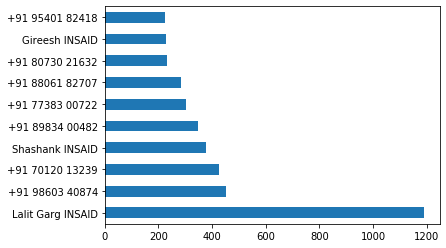

In [106]:
author_counts=df.Author.value_counts()
top_10_author_counts=author_counts.head(10)
top_10_author_counts
top_10_author_counts.plot.barh()

Above graph shows Lalit is the most active person in the group approx 1200 messages

In [112]:
df['Word_Count'] = df['Message'].apply(lambda s : len(s.split(' ')))
sorted_df=df.sort_values(by='Word_Count',ascending=False)
sorted_df=sorted_df['Word_Count'].value_counts()
sorted_df=sorted_df.head(10)
sorted_df

1     1607
2      611
4      575
5      515
3      502
6      442
7      401
8      357
9      292
10     229
Name: Word_Count, dtype: int64

In [113]:
df.head()

,Date,Time,Author,Message,Word_Count
0,9/22/19,11:03 AM,+91 80508 32456,Waiting for this message,4
1,9/22/19,11:04 AM,+91 98100 45452,OK jatin.,2
2,9/22/19,11:04 AM,+91 80508 32456,Welcome back Paras.. 😊,4
3,9/22/19,11:05 AM,+52 1 33 3101 4944,And you can watch youtube tutorials to work on...,22
4,9/22/19,11:05 AM,+91 80508 32456,Ok so we have now two weeks of time.. Revise e...,28


Text(0, 0.5, 'Date')

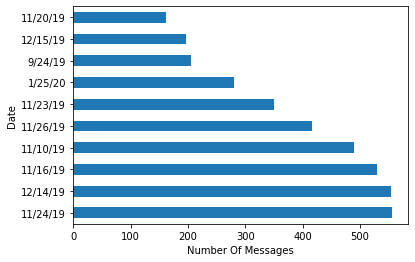

In [115]:
df['Date'].value_counts().head(10).plot.barh()
plt.xlabel('Number Of Messages')
plt.ylabel('Date')

In [116]:
!pip install wordcloud

In [0]:
def getMessageWords(df):
  whatsapp_message=' '
  for message in df['Message']:
    whatsapp_message=whatsapp_message + message+' '
  
  return whatsapp_message

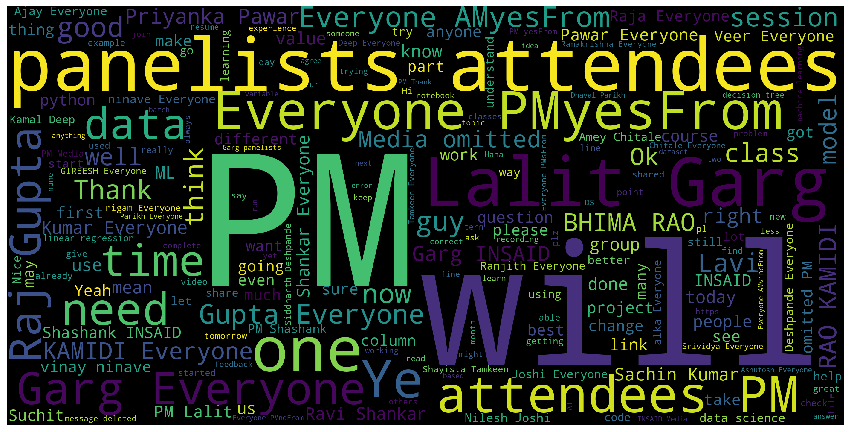

In [139]:
stopWords = set(STOPWORDS)
message_words=getMessageWords(df)
wordcloud=WordCloud(stopwords=stopWords,width=2800, height=1400).generate(message_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off") 
plt.show()

Divide Data On Basis of AM and PM

In [144]:
am_message=df[df['Time'].str.contains('AM',case=False)]
len(am_message)

2364

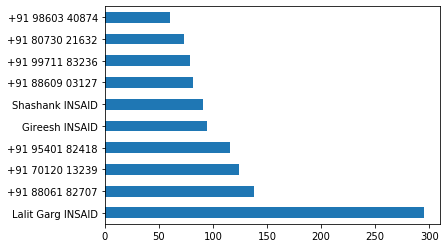

In [148]:
morningMostActive=am_message.Author.value_counts()
morningMostActive.head(10).plot.barh()


In [146]:
pm_message=df[df['Time'].str.contains('PM',case=False)]
len(pm_message)

5069

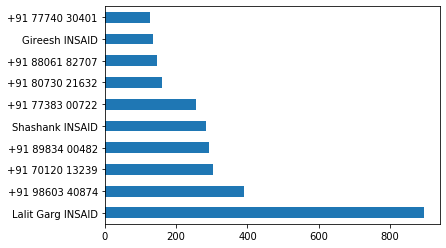

In [149]:
eveningMostActive=pm_message.Author.value_counts()
eveningMostActive.head(10).plot.barh()